數據資料來源為美國加利福尼亞大學爾灣分校UCI的開源資料https://archive.ics.uci.edu/ 裡的https://archive.ics.uci.edu/dataset/161/mammographic+mass 乳房X光數值


研究動機 :
    長年以來，癌症一直是台灣死因中最主要的原因之一，與第二名相比，其發生率幾乎高出了2倍。全球科學家一直在努力研究，希望能夠減少癌症所造成的悲劇次數。根據台灣衛福部國健署的統計數據顯示，女性乳癌的發病率逐年上升，從110年的2913人佔比17.1%，提升至111年的24.1%。這樣的增長速度非常令人擔憂。乳癌檢測的主要方法之一是X光攝影檢查，其優點在於對早期乳癌的鈣化點具有敏感檢測能力，可以在疾病早期進行預防和治療。然而，這種檢查需要對乳房進行緊壓，可能會引起疼痛和低劑量輻射，因此通常建議每1到2年進行一次檢查。由於檢測的準確性無法達到100%，因此我們希望通過應用AI機器學習技術來提高檢測準確率，並準確判斷腫瘤的性質，是良性還是惡性。

步驟:
    1.先處理資料中含有缺失值或是極端值等數據不平等的情況再做標準化
    2.再使用各種機器學習中的模型來訓練和測試資料
      Decision Trees、SVM、KNN、Naive Bayes、Logistic Regression等
    3.判斷哪個更具有效益且更高的準確度

## ## 資料:資料前處理

In [1]:
import pandas as pd
from sklearn import preprocessing

#讀取檔給予列名
data = pd.read_csv("mammographic_masses.data.txt",
                   header=None,
                   names= ["BI_RADS",
                           "age",
                           "shape",
                           "margin",
                           "density",
                           "severity"],
                   na_values=["?"])
print("前五項檢查有無讀取正確\n",data.head(), "\n")

#統計法看有無偏差極端或數據不平等
print("統計資料\n",data.describe(), "\n")

#列出有空值的列
print("列出有缺失值的所有列\n",data.loc[(data['age'].isnull()) |
         (data['shape'].isnull()) |
         (data['margin'].isnull()) |
         (data['density'].isnull())], "\n")

#刪除null值
#如果這裡沒inplace=True的話dropna()會返回一個修改後的data而不是修改原始數據
data.dropna(inplace=True)
print("刪除完缺失值的所有列\n",data, "\n")

#提取特徵、預測目標、標籤名
all_features = data[['age', 'shape', 'margin', 'density']].values
all_prediction = data['severity'].values
feature_names = ['age', 'shape', 'margin', 'density']

#標準化
scaler = preprocessing.StandardScaler()
normalized_all_features= scaler.fit_transform(all_features)
print("標準化後處裡完的資料:\n",normalized_all_features)

前五項檢查有無讀取正確
    BI_RADS   age  shape  margin  density  severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1 

統計資料
           BI_RADS         age       shape      margin     density    severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.00

# Decision Trees 決策樹

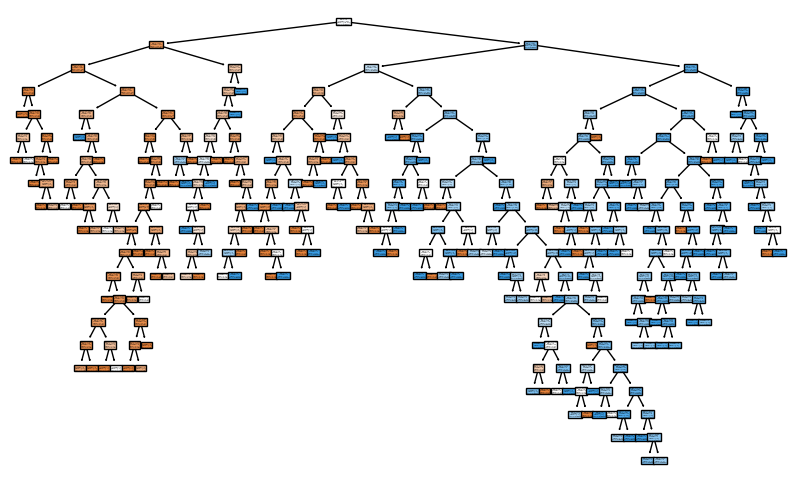

模型的準確度為: 0.7451923076923077


In [2]:
#印出來的決策樹可以下載下來觀看，每格的字都有詳細數值，不是亂印出來

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#把數據分割成訓練集75%和測試集25%，在設定random_state=1以方便觀看
training_inputs, testing_inputs, training_prediction, testing_prediction = train_test_split(normalized_all_features,
                                                                                            all_prediction,
                                                                                            test_size=0.25,
                                                                                            random_state=1)
#使用訓練集進行決策樹模型的訓練
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(training_inputs, training_prediction)

plt.figure(figsize=(10, 6))
tree.plot_tree(tree_classifier,
               filled=True,#自動填充色彩提高可視化
               feature_names=feature_names,
               class_names=['Benign', 'Malignant'])
plt.show()

#使用模型對測試數據進行預測
y_pred = tree_classifier.predict(testing_inputs)
accuracy = accuracy_score(testing_prediction, y_pred)
print("模型的準確度為:", accuracy)

#印出來的決策樹可以下載下來觀看，每格的字都有詳細數值，不是亂印出來

In [58]:
#以下為用k-fold交叉驗證決策樹模型看是否能提升準確度

from sklearn.model_selection import cross_val_score

#使用交叉驗證評估模型
scores = cross_val_score(tree_classifier,#指定要評估的模型
                         normalized_all_features,
                         all_prediction,#目標變量
                         cv=10)

n=0
for k in scores:
    n=n+1
    print(n,"次的準確度: ", k,"\n")

print("平均的準確度:", scores.mean())

1 次的準確度:  0.7349397590361446 

2 次的準確度:  0.7710843373493976 

3 次的準確度:  0.7349397590361446 

4 次的準確度:  0.7469879518072289 

5 次的準確度:  0.7590361445783133 

6 次的準確度:  0.6987951807228916 

7 次的準確度:  0.7349397590361446 

8 次的準確度:  0.7590361445783133 

9 次的準確度:  0.7469879518072289 

10 次的準確度:  0.6746987951807228 

平均的準確度: 0.736144578313253


In [59]:
#以下為用RandomForestClassifier隨機森林模型結合交叉驗證看是否能夠提升準確度
from sklearn.ensemble import RandomForestClassifier

#設10棵樹來建隨機森林
clf = RandomForestClassifier(n_estimators=10,random_state=1)

#使用交叉驗證
cv_scores = cross_val_score(clf, normalized_all_features, all_prediction, cv=10)

#交叉驗證準確平均
average_accuracy = cv_scores.mean()
print("平均的準確度:", average_accuracy)

平均的準確度: 0.7421686746987952


# SVM 支撐向量機

In [60]:
from sklearn import svm

svc = svm.SVC(kernel = 'linear', C=1)

#使用交叉驗證
cv_scores = cross_val_score(svc, normalized_all_features, all_prediction, cv=10)
cv_scores.mean()

0.7975903614457832

# Revisiting SVM

In [61]:
#以下用各種SVM裡的核函數來改變向量機在特徵空間裡計算點與點之間距離的方式
#從而影響模型的分類性能

kernels = ['rbf', 'sigmoid', 'poly']
best_accuracy = 0
best_kernel = ''

for kernel in kernels:
    svc = svm.SVC(kernel=kernel)
    
    #使用交叉驗證評估模型
    cv_scores = cross_val_score(svc, normalized_all_features, all_prediction, cv=10)
    
    #計算平均準確率
    average_accuracy = cv_scores.mean()
    
    #更新最佳性能和核函数
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_kernel = kernel
        
print("\n最好的核函數(performing kernel)為:", best_kernel)
print("準確度最高為:", best_accuracy)


最好的核函數(performing kernel)為: rbf
準確度最高為: 0.8012048192771084


# KNN

In [62]:
from sklearn import neighbors

best_mean = 0
best_k = 0

for k in range(1,100):
    #建立KNN分類器
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    
    #使用10折交叉驗證計算平均準確度
    cv_scores = cross_val_score(clf, normalized_all_features, all_prediction, cv=10)
    print(k,cv_scores.mean())
    
    #更新最佳平均準確度和最佳K值
    if cv_scores.mean() > best_mean:
        best_mean = cv_scores.mean()
        best_k = k
        
print("\nK值最好為:", best_k)
print("準確度最高為:", best_mean)

1 0.7228915662650601
2 0.6855421686746987
3 0.7530120481927711
4 0.7385542168674699
5 0.7783132530120482
6 0.7650602409638554
7 0.7975903614457832
8 0.7819277108433734
9 0.7927710843373493
10 0.7927710843373494
11 0.7951807228915662
12 0.7843373493975905
13 0.7843373493975904
14 0.7855421686746988
15 0.7855421686746988
16 0.7831325301204819
17 0.7867469879518072
18 0.7783132530120482
19 0.7855421686746988
20 0.7843373493975904
21 0.7867469879518072
22 0.783132530120482
23 0.7795180722891566
24 0.7771084337349399
25 0.7855421686746988
26 0.7831325301204819
27 0.7843373493975904
28 0.7843373493975904
29 0.7867469879518072
30 0.7843373493975904
31 0.7867469879518072
32 0.789156626506024
33 0.7867469879518072
34 0.789156626506024
35 0.7843373493975904
36 0.7867469879518072
37 0.7831325301204819
38 0.7867469879518072
39 0.7819277108433734
40 0.7843373493975904
41 0.7819277108433734
42 0.7831325301204819
43 0.7831325301204819
44 0.7843373493975904
45 0.7831325301204819
46 0.7831325301204819


# Naive Bayes 貝氏分類器

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing#該套件用於資料處裡，標準化、正規化、填補缺失值等

#對特徵數據進行最小最大縮放提高模型收斂速度和消除不同特徵間的量級差異
calculate = preprocessing.MinMaxScaler()
all_features_minmax = calculate.fit_transform(all_features)

clf = MultinomialNB()

#使用交叉驗證評估模型
cv_scores = cross_val_score(clf, all_features_minmax, all_prediction,cv=10)


#計算平均準確率
average_accuracy = cv_scores.mean()
print("計算平均準確率為 :", average_accuracy)

計算平均準確率為 : 0.7855421686746988


# Logistic Regression 邏輯迴歸

In [64]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#使用交叉驗證評估模型
cv_scores = cross_val_score(logreg, normalized_all_features, all_prediction, cv=10)

#計算平均準確率
average_accuracy = cv_scores.mean()
print("計算平均準確率為 :", average_accuracy)

計算平均準確率為 : 0.8072289156626505


經過實際測試，KNN模型展現出較高的準確性和可靠性，這一發現對於改善乳癌檢測流程，提高準確性，
並減少誤診率具有重要意義，有望對提高乳癌患者的生存率和生活品質產生積極影響。